In [1]:
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import os

In [2]:
# load environment variables from .env file for project
dotenv_path = Path('../.env')
load_dotenv(dotenv_path=dotenv_path)

True

We converted the `comma-separated values files` (CSV) in a earlier stage to `Apache parquet` files. Parquet files make processing with `pandas` faster and more memory efficient. The processed parquet files are the `OUTPUT_DIRECTORY` given in the `.env` file of the project.

In [3]:
data_directory = os.getenv("OUTPUT_DIRECTORY")

List all files in the `OUTPUT_DIRECTORY`.

In [4]:
os.listdir(data_directory)

['OmzetEansCoicopsPlus_202206_202308.parquet',
 'converted_csvs',
 'OmzetEansCoicopsLidl_202007_202202.parquet',
 'OutputEansCoicopsPlus_202107_202205.parquet',
 'OmzetEansCoicopsPlus_202107_202205.parquet',
 'OmzetEansCoicopsLidl_202203_202308.parquet',
 'KassabonPlus_va_202201.parquet',
 'OmzetEansCoicopsLidl_2018_202006.parquet']

Let's focus on the LIDL file first.

In [6]:
lidl_df = pd.read_parquet(os.path.join(data_directory, 'OmzetEansCoicopsLidl_2018_202006.parquet'), engine="pyarrow")
lidl_df.head()

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
0,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3184145,62789.0,Badreiniger,210.869995,213.0
1,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3185902,77358.0,Galzeep,52178.578125,35037.0
2,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3182649,90982.0,Allesreiniger SK1,149383.468750,150896.0
3,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3186380,90986.0,Allesreiniger eco,0.990000,1.0
4,908515,201808,56110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3192008,99134.0,Eco afwasmiddel SK3,28517.759766,28826.0


As per their definition COICOP definitions should be 5 digits long: 
- Two digits for the COICOP division, ranging from 01 until
- One digit for the COICOP group
- One digit for the COICOP class
- One digit for the COICOP subclass
See for more information the PDF [here](https://unstats.un.org/unsd/classifications/unsdclassifications/COICOP_2018_-_pre-edited_white_cover_version_-_2018-12-26.pdf). 
Check if this is the case for the coicop numbers in the LIDL dataframe.

In [9]:
lidl_df.coicop_number.str.len().value_counts().reset_index()

,coicop_number,count
0,5,123416
1,6,32925
2,1,1367


It seems there are COICOP numbers with 5 digits, 6 digits, and even 1 digits. Let's check the COICOP numbers with one digit first:

In [12]:
lidl_df[lidl_df.coicop_number.str.len() == 1].head(10)

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
3618,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927206,327185.0,Fietsbel ping,17.900000,18.0
3619,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927207,327187.0,Fietswielverlichting LED,73.010002,15.0
3620,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927208,327218.0,Zadelhoes,69.000000,69.0
3621,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,17927209,344101.0,Fietskrat wit,26.969999,3.0
3622,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193227,8005.0,Elektrische push-bel,2.000000,1.0
3623,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193231,8009.0,Spiraalslot,10.000000,2.0
3624,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193232,8010.0,Kettingslot,120.000000,24.0
3625,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193233,8017.0,Fietstas 35 L,14.990000,1.0
3626,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193235,8029.0,Bagagedragerkussen,43.889999,11.0
3627,908515,202001,0,Onbekend,0,Onbekend,121_100,Sport Hartwaren_Fahrrad,3193239,8035.0,Fietszadel design,5.000000,1.0


The COICOP number for COICOP numbers of length 1 has value 0 for the first 10 rows. See which other values are possible:

In [14]:
lidl_df[lidl_df.coicop_number.str.len() == 1].coicop_number.value_counts()

coicop_number
0    1367
Name: count, dtype: int64

It seems all COICOP numbers with lenght 1 have value 0. This seems a special value? Let's check the COICOP values with 6 digits:

In [16]:
lidl_df[lidl_df.coicop_number.str.len() == 6].head(10)

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
29,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3180116,118452.0,Professionele haarzorg BB Balm,20812.519531,5217.0
30,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3186854,133014.0,Hairvital cr?mespoeling SK3,22647.830078,25447.0
31,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183260,1746.0,Stylingmousse extra sterk SK4,11057.309570,11169.0
32,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183731,368.0,Shampoo 2 in 1 pro vitamine SK2,17592.630859,19767.0
33,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3188107,108082.0,Finding Nemo knijpzeep,123.169998,43.0
35,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189861,108087.0,Finding Nemo magische handdoek,1642.510010,876.0
36,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189984,108448.0,Finding Nemo badkleurtabletten SK1,116.900002,40.0
37,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3180124,119480.0,Knijpzeep Cars,10189.910156,4092.0
38,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3183252,1724.0,Douchegel sport/sens SK8,30864.310547,34679.0
39,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3190510,5515307.0,Douchegel XXL SK1,1.590000,1.0


Check what are the possible values for COICOPs with 6 digits:

In [18]:
lidl_df[lidl_df.coicop_number.str.len() == 6].coicop_number.value_counts()

coicop_number
999999    26699
121320     5629
121210      499
121310       98
Name: count, dtype: int64

It looks like there are only four different values for COICOP numbers with 6 digits:
- 999999
- 121320     
- 121210      
- 121310       

`999999` seems a special value, maybe missing values or an additional category? The other values are not that clear. Check the COICOP numbers with lenght 5.

In [19]:
lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.value_counts()

coicop_number
31220    7976
11140    7914
21210    7059
31210    5781
11270    5099
         ... 
11930     133
21110     110
95410     110
12130      72
95220      41
Name: count, Length: 76, dtype: int64

It seems there are 76 unique COICOP values with length 5. Check is this is indeed the case:

In [20]:
lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.nunique()

76

This seems correct. Because we 5 and 6 digit COICOP numbers, it might be the case that the CBS classifies the COICOP one level deeper than the specification. The COICOP specification specifies the COICOP division using two digits. The first categories in the COICOP classification 1-9 are defined using a leading zero. See if we can find any leading zeroes in the COICOP numbers defined by LIDL.

In [23]:
lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.str.startswith("0").sum()

0

This does not seem to be the case. It looks like the coicop numbers in the LIDL file are missing the leading zero. This means that the 6 digit labels we found about are part of COICOP division `12`, "Insurance and financial services". This is a bit strange because above the product descriptions appear to be all "articles for personal hygiene" which are defined to be in COICOP division `13.1`.

In [26]:
lidl_df[(lidl_df.coicop_number.str.len() == 6) & (lidl_df.coicop_number.str.startswith("12"))].head(10)

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount
29,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3180116,118452.0,Professionele haarzorg BB Balm,20812.519531,5217.0
30,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3186854,133014.0,Hairvital cr?mespoeling SK3,22647.830078,25447.0
31,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183260,1746.0,Stylingmousse extra sterk SK4,11057.309570,11169.0
32,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_10,Kosmetik_Haarpflege,3183731,368.0,Shampoo 2 in 1 pro vitamine SK2,17592.630859,19767.0
33,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3188107,108082.0,Finding Nemo knijpzeep,123.169998,43.0
35,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189861,108087.0,Finding Nemo magische handdoek,1642.510010,876.0
36,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3189984,108448.0,Finding Nemo badkleurtabletten SK1,116.900002,40.0
37,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3180124,119480.0,Knijpzeep Cars,10189.910156,4092.0
38,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3183252,1724.0,Douchegel sport/sens SK8,30864.310547,34679.0
39,908515,201808,121320,Artikelen voor persoonlijke hygiëne en wellne...,121320901,Artikelen voor persoonlijke hygiëne en wellnes...,82_20,"Kosmetik_Duschgel, Bäder, Seifen",3190510,5515307.0,Douchegel XXL SK1,1.590000,1.0


Let's assume for now that the labeling is correct, and add the trailing zero to COICOP numbers with length 5.

In [30]:
lidl_df.loc[lidl_df.coicop_number.str.len() == 5, 'coicop_number'] = lidl_df[lidl_df.coicop_number.str.len() == 5].coicop_number.apply(lambda s: f"0{s}")

In [31]:
lidl_df.coicop_number.str.len().value_counts().reset_index()

,coicop_number,count
0,6,156341
1,1,1367


In [34]:
lidl_df['coicop_division'] = lidl_df[lidl_df.coicop_number.str.len() == 6].coicop_number.str[:2]
lidl_df.head()

,bg_number,month,coicop_number,coicop_name,isba_number,isba_name,esba_number,esba_name,rep_id,ean_number,ean_name,revenue,amount,coicop_division
0,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3184145,62789.0,Badreiniger,210.869995,213.0,05
1,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3185902,77358.0,Galzeep,52178.578125,35037.0,05
2,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3182649,90982.0,Allesreiniger SK1,149383.468750,150896.0,05
3,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3186380,90986.0,Allesreiniger eco,0.990000,1.0,05
4,908515,201808,056110,Schoonmaak- en onderhoudsproducten,56110901,Schoonmaak- en onderhoudsproducten,83_20,"Wasch-/Putz-/Reinigungsmittel_Putz-, Reinigung...",3192008,99134.0,Eco afwasmiddel SK3,28517.759766,28826.0,05


<Axes: xlabel='coicop_division'>

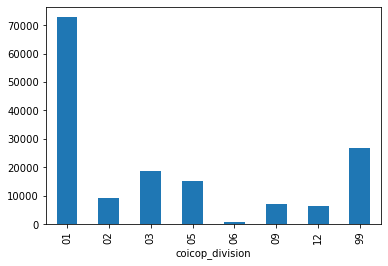

In [41]:
lidl_df.coicop_division.value_counts().sort_index().plot(kind="bar")